# Markov Regime Switching Regression Model
_______

## In probability theory, a Markov model is a stochastic model used to model pseudo-randomly changing systems. It is assumed that future states depend only on the current state, not on the events that occurred before it. 
#### Source: [Wikipedia](https://en.wikipedia.org/wiki/Markov_model#Introduction)



In [47]:
''' 
Source:

https://www.statsmodels.org/stable/generated/statsmodels.tsa.regime_switching.markov_regression.MarkovRegression.html

https://www.statsmodels.org/devel/examples/notebooks/generated/markov_regression.html

'''

' \nSource:\n\nhttps://www.statsmodels.org/stable/generated/statsmodels.tsa.regime_switching.markov_regression.MarkovRegression.html\n\nhttps://www.statsmodels.org/devel/examples/notebooks/generated/markov_regression.html\n\n'

In [48]:
# Import libraries
import numpy as np
import datetime
import warnings
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.regime_switching import markov_regression

%matplotlib inline

In [97]:
# Read in SPY price (Adj Close) data from csv file (Adj Close prices pulled from the yahoo_historical.ipynb)
stock_prices = pd.read_csv("/Users/draganbogatic/Documents/Fin_Tech/stock-evaluation/Resources/stock_historical_prices.csv", parse_dates=True, index_col='Date')
stock_prices = stock_prices.resample('W').ffill()
#We will use weekly returns from 2018-2021 to easier identify regime shifts
stock_prices = stock_prices.loc['2018':'2021'].dropna()
stock_prices.head()

,Adj Close
Date,
2018-01-07,257.665283
2018-01-14,261.905975
2018-01-21,264.252472
2018-01-28,270.066925
2018-02-04,259.578278


In [98]:
# Calculate weekly return
stock_prices["Return"] = stock_prices['Adj Close'].pct_change()
stock_return = stock_prices["Return"]
stock_return = stock_return.dropna()
stock_return.head()

Date
2018-01-14    0.016458
2018-01-21    0.008959
2018-01-28    0.022003
2018-02-04   -0.038837
2018-02-11   -0.050644
Freq: W-SUN, Name: Return, dtype: float64

<AxesSubplot:title={'center':'SPY Weekly Returns'}, xlabel='Date'>

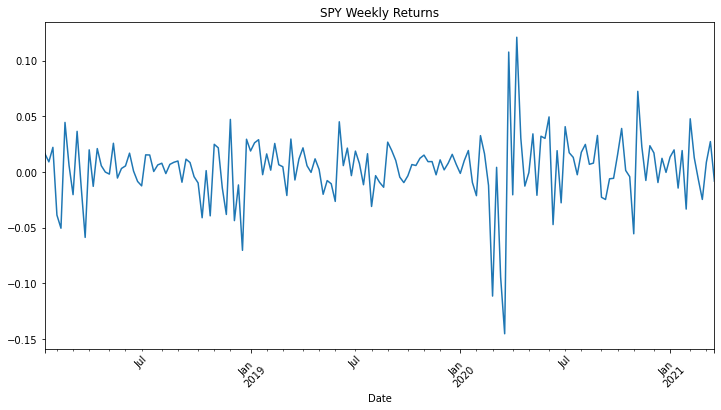

In [111]:
# Plot weekly returns
stock_return.plot(title='SPY Weekly Returns',figsize=(12,6),rot=45)

In [100]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
adfuller(stock_return)

(-14.255901112814508,
 1.4541941501296264e-26,
 0,
 166,
 {'1%': -3.4703698981001665,
  '5%': -2.8791138497902193,
  '10%': -2.576139407751488},
 -633.3616905378465)

In [53]:
# The series is stationary (the p-value of the ADFuller test is close to 0) and the model can be fit on it.

In [102]:
# Fit the model (we use switching variance in the model, 2 regimes - standard and high, weekly stock return, no trend)
mod_high_regime = sm.tsa.MarkovRegression(stock_return, k_regimes=2, trend='nc', switching_variance=True, freq='W')
res_high_regime = mod_high_regime.fit()
res_high_regime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 Return   No. Observations:                  167
Model:               MarkovRegression   Log Likelihood                 380.093
Date:                Thu, 15 Apr 2021   AIC                           -752.186
Time:                        23:50:53   BIC                           -739.714
Sample:                    01-14-2018   HQIC                          -747.124
                         - 03-21-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   5.47e-05      4.980      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0026      0.001      3.567      0.000       0.001       0.004
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9511      0.027     35.770      0.000       0.899       1.003
p[1->0]        0.1327      0.077      1.728      0.084      -0.018       0.283
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<AxesSubplot:title={'center':'Probability of being in the high regime'}, xlabel='Date'>

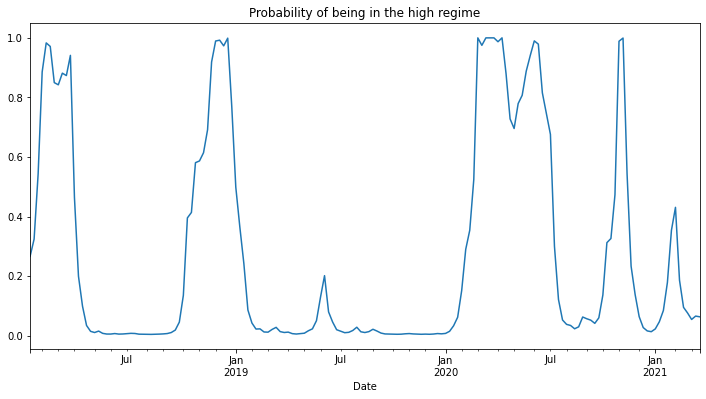

In [103]:
# Plot high regime
res_high_regime.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,6))

In [56]:
# The above graph shows that Covid-19 2020 year was the year of high regime and prolonged high return volatility due to global crisis 

In [104]:
# Calculate the duration of regimes
print(res_high_regime.expected_durations)

[20.46281662  7.53574153]


In [58]:
# Low volatility regime will persist approx. 21 weeks and high volatility regime 8 weeks.

<AxesSubplot:title={'center':'SPY Actual Weekly Returns'}, xlabel='Date'>

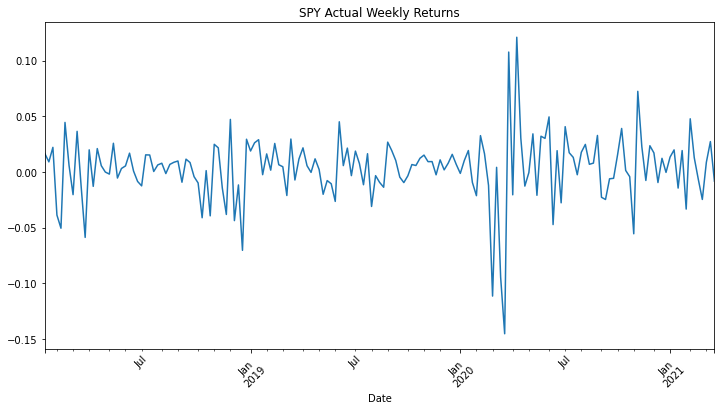

In [109]:
# Plot actual daily returns
actual_return = stock_return.plot(title='SPY Actual Weekly Returns',figsize=(12,6),rot=45)
actual_return

In [106]:
# Modify model to include lagged return data
mod_high_regime_2 = sm.tsa.MarkovRegression(stock_return.iloc[1:],k_regimes=2, exog=stock_return.iloc[:-1])
res_high_regime_2 = mod_high_regime_2.fit()
res_high_regime_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 Return   No. Observations:                  166
Model:               MarkovRegression   Log Likelihood                 372.846
Date:                Thu, 15 Apr 2021   AIC                           -731.693
Time:                        23:52:35   BIC                           -709.909
Sample:                    01-21-2018   HQIC                          -722.850
                         - 03-21-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0585      0.013     -4.596      0.000      -0.083      -0.034
x1             0.8031      0.171      4.701      0.000       0.468       1.138
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0080      0.002      3.969      0.000       0.004       0.012
x1            -0.2950      0.076     -3.879      0.000      -0.444      -0.146
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0005   6.58e-05      7.366      0.000       0.000       0.001
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.1628      0.139      1.173      0.241      -0.109       0.435
p[1->0]        0.0540      0.031      1.756      0.079      -0.006       0.114
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<AxesSubplot:title={'center':'Probability of being in the high regime'}, xlabel='Date'>

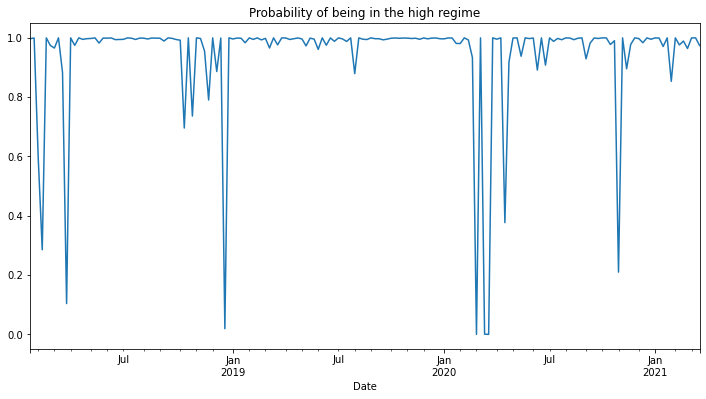

In [107]:
res_high_regime_2.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,6))

In [108]:
print(res_high_regime_2.expected_durations)

[ 1.19443282 18.50169447]


In [63]:
# Lagged returns model is better fit than the previous model (lower AIC and BIC scores). It shows that during the analyzed time period low regime will persist for approx. 10 days while high regime will persist for appox. 19 weeks days. 

In [112]:
prediction = res_high_regime_2.predict()

In [113]:
# Add predicted daily return to dataframe
stock_prices["Return"] = stock_prices['Adj Close'].pct_change()
stock_prices
stock_prices['Predicted'] = prediction
stock_prices.dropna()

,Adj Close,Return,Predicted
Date,,,
2018-01-21,264.252472,0.008959,0.002969
2018-01-28,270.066925,0.022003,0.005290
2018-02-04,259.578278,-0.038837,-0.015554
2018-02-11,246.432068,-0.050644,-0.058562
2018-02-18,257.373077,0.044398,0.022904
...,...,...,...
2021-02-21,388.756714,-0.006647,0.003644
2021-02-28,379.118286,-0.024793,0.007278
2021-03-07,382.377625,0.008597,0.015275


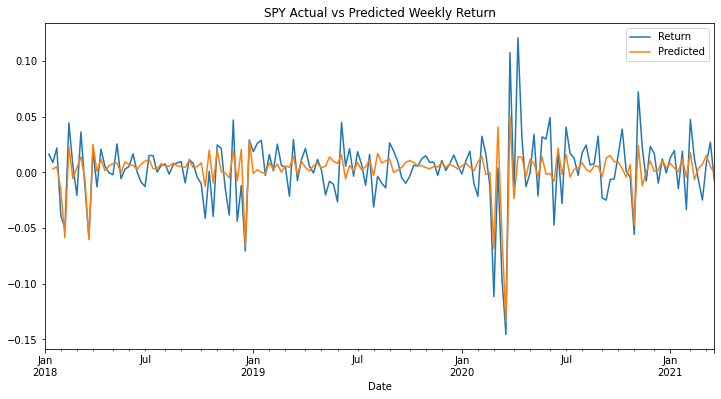

In [141]:
combined = stock_prices[['Return','Predicted']].plot(title='SPY Actual vs Predicted Weekly Return', figsize=(12,6))

In [67]:
# The above graph suggests that the model is able to predict extreme regime shifts for the analyzed period. These are periods of high return volatility. It recognizes 2020 as the year of extreme volatility due to world Covid-19 crisis.

In [115]:
stock_prices.describe()

,Adj Close,Return,Predicted
count,168.000000,167.000000,166.000000
mean,293.016528,0.002931,0.002850
std,39.398496,0.029987,0.018512
min,225.188736,-0.145457,-0.134495
25%,263.341187,-0.009417,0.000480
50%,281.938660,0.005859,0.005327
75%,316.231163,0.018106,0.009502
max,392.773560,0.120915,0.050877


<AxesSubplot:ylabel='Frequency'>

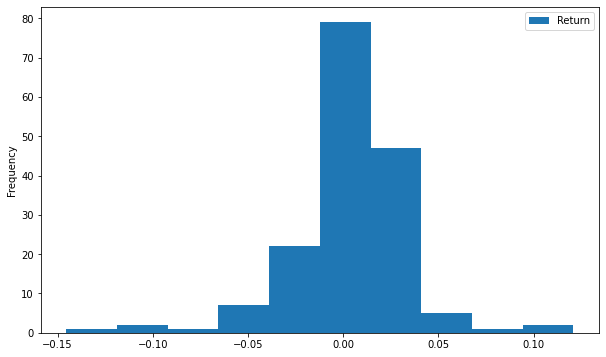

In [116]:
stock_prices[['Return']].plot(kind='hist', figsize=(10,6))

In [117]:
from random import gauss
# Calculate the specific normal distribution of analyzed stock based on its average returns and standard deviation
mean = stock_prices['Return'].mean()
std = stock_prices['Return'].std()
(mean, std)

(0.0029313377132546142, 0.029987076669963055)

In [118]:
gauss(mean, std)

-0.027444362152569367

<AxesSubplot:ylabel='Frequency'>

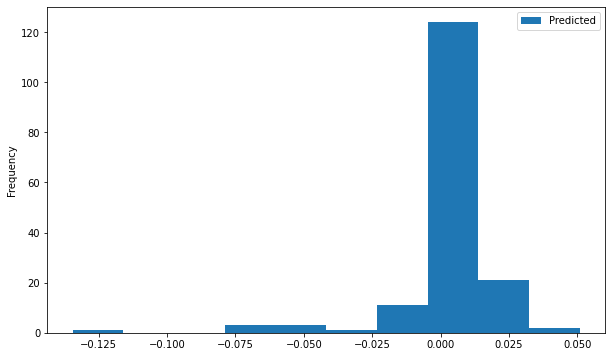

In [119]:
stock_prices[['Predicted']].plot(kind='hist', figsize=(10,6))

In [120]:
mean = stock_prices['Predicted'].mean()
std = stock_prices['Predicted'].std()
(mean, std)

(0.002849853252149258, 0.01851196916015911)

In [121]:
gauss(mean, std)

-0.012366751543490056

In [ ]:
# SPY ETF predicted values exhibit non-normal distribution with extreme left tail outliiers 

# Predicting the market volatility and Markov regime shifts using VXX ETF as a proxy for market volatility

In [122]:
# Read in VIX price (Adj Close) data from csv file (Adj Close prices pulled from the yahoo_historical.ipynb)
vix_prices = pd.read_csv("/Users/draganbogatic/Documents/Fin_Tech/stock-evaluation/Resources/VXX_stock_historical_prices.csv", parse_dates=True, index_col='Date')
vix_prices = stock_prices.resample('W').ffill()
#We will use weekly returns from 2018-2021
vix_prices = vix_prices.loc['2018':'2021']
vix_prices = vix_prices.dropna()
vix_prices.head()

,Adj Close,Return,Predicted
Date,,,
2018-01-21,264.252472,0.008959,0.002969
2018-01-28,270.066925,0.022003,0.005290
2018-02-04,259.578278,-0.038837,-0.015554
2018-02-11,246.432068,-0.050644,-0.058562
2018-02-18,257.373077,0.044398,0.022904


In [123]:
# Calculate weekly return
vix_prices["Return"] = vix_prices['Adj Close'].pct_change()
vix_return = vix_prices["Return"]
vix_return = vix_return.asfreq('S')
vix_return = vix_return.dropna()
vix_return.head()

Date
2018-01-28    0.022003
2018-02-04   -0.038837
2018-02-11   -0.050644
2018-02-18    0.044398
2018-02-25    0.005859
Name: Return, dtype: float64

<AxesSubplot:title={'center':'VXX Daily Returns'}, xlabel='Date'>

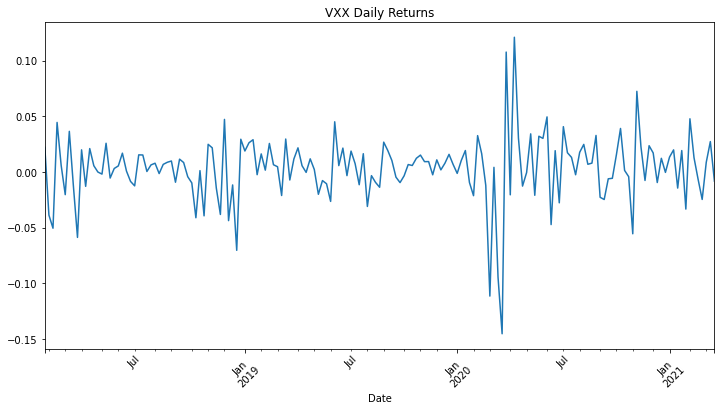

In [124]:
# Plot weekly returns
vix_return.plot(title='VXX Daily Returns',figsize=(12,6),rot=45)

In [125]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
adfuller(vix_return)

(-14.199295081253076,
 1.7994947256002592e-26,
 0,
 164,
 {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671},
 -623.0375657716545)

In [127]:
# Modify model to include lagged return data
mod_high_regime = sm.tsa.MarkovRegression(vix_return.iloc[1:],k_regimes=2, freq='W', exog=vix_return.iloc[:-1])
res_high_regime = mod_high_regime.fit()
res_high_regime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 Return   No. Observations:                  164
Model:               MarkovRegression   Log Likelihood                 367.544
Date:                Fri, 16 Apr 2021   AIC                           -721.088
Time:                        00:04:41   BIC                           -699.389
Sample:                    02-04-2018   HQIC                          -712.279
                         - 03-21-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0586      0.013     -4.626      0.000      -0.083      -0.034
x1             0.8043      0.171      4.690      0.000       0.468       1.140
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0078      0.002      3.859      0.000       0.004       0.012
x1            -0.2959      0.076     -3.876      0.000      -0.446      -0.146
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0005   6.68e-05      7.327      0.000       0.000       0.001
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.1761      0.152      1.158      0.247      -0.122       0.474
p[1->0]        0.0541      0.031      1.762      0.078      -0.006       0.114
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [128]:
print(res_high_regime.expected_durations)

[ 1.21370735 18.50019366]


In [81]:
# Duration suggests that low regime will persist for approx 1 week and high regime for 19 weeks suggesting an extended timeframe of high market volatility. Similar result as with lagged SPY model. We also need to keep in mind that VIX ETFs are not a perfect proxy for VIX fear index and they (ETFs that trade VIX) are volatilie in nature because of the way they operate. Need to evaluate more. 

<AxesSubplot:title={'center':'Probability of being in the high regime'}, xlabel='Date'>

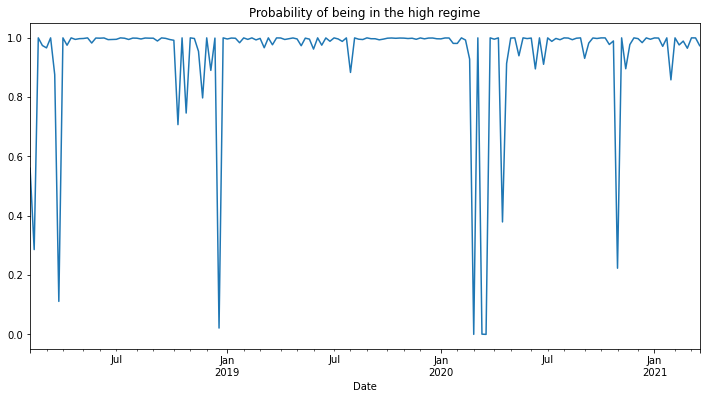

In [129]:
res_high_regime.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,6))

In [130]:
prediction = res_high_regime.predict()

In [131]:
# Add predicted daily return to dataframe
vix_prices["Return"] = vix_prices['Adj Close'].pct_change()
vix_prices['Predicted'] = prediction
vix_prices.dropna()

,Adj Close,Return,Predicted
Date,,,
2018-02-04,259.578278,-0.038837,-0.017245
2018-02-11,246.432068,-0.050644,-0.058609
2018-02-18,257.373077,0.044398,0.022791
2018-02-25,258.880920,0.005859,-0.005784
2018-03-04,253.575333,-0.020494,0.004048
...,...,...,...
2021-02-21,388.756714,-0.006647,0.003472
2021-02-28,379.118286,-0.024793,0.007193
2021-03-07,382.377625,0.008597,0.015139


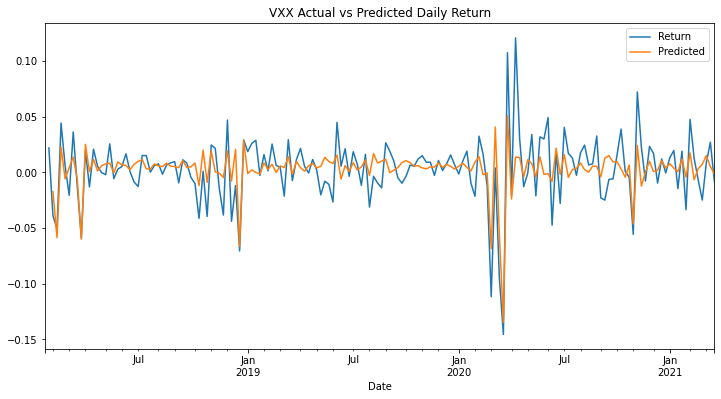

In [132]:
combined = vix_prices[['Return','Predicted']].plot(title='VXX Actual vs Predicted Daily Return', figsize=(12,6))

In [133]:
vix_prices.describe()

,Adj Close,Return,Predicted
count,166.000000,165.000000,164.000000
mean,293.416900,0.002813,0.002696
std,39.464609,0.030147,0.018592
min,225.188736,-0.145457,-0.134657
25%,263.467842,-0.009499,0.000239
50%,282.376923,0.005704,0.005226
75%,316.880501,0.018635,0.009431
max,392.773560,0.120915,0.050847


<AxesSubplot:ylabel='Frequency'>

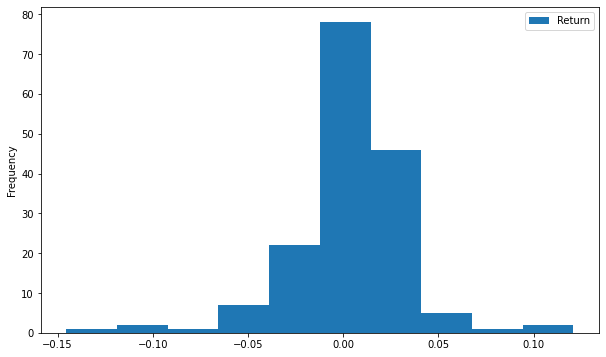

In [134]:
vix_prices[['Return']].plot(kind='hist', figsize=(10,6))

In [139]:
mean = vix_prices['Return'].mean()
std = vix_prices['Return'].std()
(mean, std)

(0.002812823913928344, 0.030146965520910538)

In [140]:
gauss(mean, std)

0.02230854492191485

<AxesSubplot:ylabel='Frequency'>

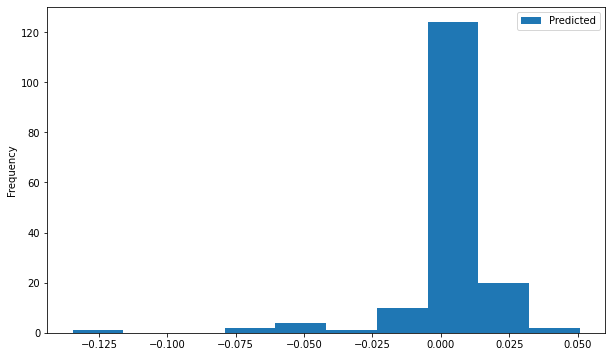

In [135]:
vix_prices[['Predicted']].plot(kind='hist', figsize=(10,6))

In [136]:
mean = vix_prices['Predicted'].mean()
std = vix_prices['Predicted'].std()
(mean, std)

(0.0026958090635547383, 0.018591612910884944)

In [137]:
gauss(mean, std)

-0.024155146390016664

In [89]:
# VIX ETF predicted values exhibit non-normal distribution with extreme left tail outliiers 